파이토치를 이용한 가장 기본적인 인공신경만 생성

- 텐서와 Autograd 패키지
- 경사 하강법으로 이미지 복원하기
- 신경망 모델 구현하기 

파이토치란?

- 기본적인 수학 계산용 라이브러리를 바탕으로 그 위에 딥러닝에 필요한 그래프 형태 계산 방식을 추가한 라이브러리
- 가장 기본적인 자료구조인 텐서가 기존의 파이썬과는 다르다. 

In [1]:
#파이토치 임포트
import torch

- 텐서는 파이토치에서 다양한 수식을 계산하는데 사용하는 가장 기본적인 자료구조.
- 수학의 벡터나 행렬을 일반화한 개념으로서, 숫자들을 특정한 모양으로 배열
- 텐서는 '차원' or '랭크'라는 개념으로 랭크0은 스칼ㄹ, 랭크1은 벡터, 랭크 2는 행렬, 랭크3은 3차원 행렬 그이상은 랭크 n 텐서

In [2]:
#텐서 만들기 - 랭크 2
x = torch.tensor([[1,2,3],[4,5,6],[7,8,9]])
print(x)

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


In [3]:
#텐서의 구체적 형태는 size, shape로 확인 가능하고 랭크 확인은 ndimension을 이용한다.
print('Size :', x.size())
print('Shape :', x.shape)
print('랭크 :', x.ndimension())

Size : torch.Size([3, 3])
Shape : torch.Size([3, 3])
랭크 : 2


In [4]:
#unsqueeze(), squeeze(), view() 함수로 텐서의 랭크와shape를 인위적으로 변경가능
#랭크 늘리기
x = torch.unsqueeze(x, 0)
print(x)
print('Size :', x.size())
print('Shape :', x.shape)
print('랭크 :', x.ndimension())

#랭크는 늘어나도 텐소 속 원소의 수는 유지 

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])
Size : torch.Size([1, 3, 3])
Shape : torch.Size([1, 3, 3])
랭크 : 3


In [5]:
#랭크 줄이기
x = torch.squeeze(x)
print(x)
print('Size :', x.size())
print('Shape :', x.shape)
print('랭크 :', x.ndimension())

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Size : torch.Size([3, 3])
Shape : torch.Size([3, 3])
랭크 : 2


In [6]:
#view를 통해 랭크 1의 [9]모양으로 변경
x = x.view(9)
print(x)
print('Size :', x.size())
print('Shape :', x.shape)
print('랭크 :', x.ndimension())

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])
Size : torch.Size([9])
Shape : torch.Size([9])
랭크 : 1


In [7]:
#원소의 갯수를 바꿀수는 없다. ( 에러 발생 예)
try:
    x = x.view(2,4)
except Exception as e:
    print(e)

shape '[2, 4]' is invalid for input of size 9


텐서를 이용한 연산과 행렬 곱
- 기본적으로 행렬과 행렬곱 개념은 모든 딥러닝 알고리즘에서 이용된다. 

In [8]:
#행렬곱 구현
#행렬 w = 정규분포에서 무작위로 값을 뽑아 5*3의 shape를 가진 텐서 생성
#행렬 x = 직접 실수형 원소를 넣어 3*2 shape텐서 생성
w = torch.randn(5,3, dtype=torch.float)
x = torch.tensor([[1.0,2.0],[3.0,4.0],[5.0,6.0]])
print('w size :', w.size())
print('x size :', x.size())
print('w', w)
print('x', x)

w size : torch.Size([5, 3])
x size : torch.Size([3, 2])
w tensor([[ 0.0278, -2.4437,  0.0245],
        [ 0.6756, -0.4720,  0.9684],
        [-0.2773,  0.2174,  1.4467],
        [ 2.0620, -0.1143,  1.3107],
        [ 0.2481,  1.6981, -0.5938]])
x tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])


In [11]:
#다른 행렬 연산에 쓰일 b 추가
b = torch.randn(5,2, dtype =torch.float)
print('b size', b.size())
print('b:', b)

b size torch.Size([5, 2])
b: tensor([[ 0.9958,  0.5458],
        [-0.2546,  0.6028],
        [ 1.1154, -0.9887],
        [ 2.0499, -0.5923],
        [-0.9188, -0.1848]])


In [12]:
#행렬곱은 torch.mm()함수 이용
wx = torch.mm(w,x)
print('wx size :', wx.size())
print('wx :', wx)

wx size : torch.Size([5, 2])
wx : tensor([[-7.1810, -9.5725],
        [ 4.1016,  5.2736],
        [ 7.6082,  8.9949],
        [ 8.2729, 11.5314],
        [ 2.3737,  3.7262]])


In [13]:
#wx에 b 더하기
result = wx+b
print('result size', result.size())
print('result ', result)

result size torch.Size([5, 2])
result  tensor([[-6.1852, -9.0267],
        [ 3.8470,  5.8764],
        [ 8.7235,  8.0062],
        [10.3228, 10.9391],
        [ 1.4549,  3.5414]])


Autograd

- 수식의 기울기를 자동으로 계산한다. 
- 데이터에 대한 정답과 머신러닝 예측결과의 차이를 산술적으로 표현한 것을 거리라고 한다. 
- 학습 데이터로 계산한 거리들의 평균을 오차라고 한다. 
- 오차를 최소화 하는 방법에는 여러 알고리즘들이 많이 쓰이지만 주로 경사하강법이 쓰인다. 
- 경사 하강법이란 오차를 수학 함수로 표현한 후 미분하여 이 함수의 기울기를 구해 오차의 최솟값이 있는 방향을 찾는 것이다. 
- 복잡하지 않은 모델에서는 numpy와 같은 라이브러리로 구현 가능하지만 복잡한 인공신경망 모델은 어렵다. 
- Autograd는 미분 계산을 자동화하여 경사하강법 구현을 편리하게 해준다. 

In [14]:
#값이 1.0인 스텔라 텐서 w 정의, 미분후 기울기 계산
w = torch.tensor(1.0, requires_grad = True)

In [15]:
a = w*3

In [16]:
l = a**2

In [17]:
#l을 w로 미분하려면 연쇄법칙을 적용하여 a와 w로 차례대로 미분해야한다. 
# backward 함수이용
l.backward()
print('l을 w로 미분한 값 ', w.grad)

l을 w로 미분한 값  tensor(18.)


경사하강법으로 이미지 복원하기 
- 이번 예제는 최적화를 직접 구현하여 오염된 이미지 복원

    1) 오염된 이미지와 크기가 같은 랜덤 텐서 생성
    2) 랜덤 텐서를 오염된 이미지를 생성해낸 함수에 입력해 똑같이 오염된 이미지를 가설이라 명명
        1) 원본 이미지가 함수에 입력되어 오염된 이미지 출력했음
        2) 인위적으로 생성한 이미지가 함수에 입력되어 가설 출력
    3) 가설과 오염된 이미지가 같다면 무작위 이미지와 원본 이미지도 같을 것이다. 
    4) 이미지 함수(random_tensor) = broken_image관계가 성립하도록 만든다. 
    
- 머신러닝 모델이 학습한다는 것은 모델 출력결과값과 정답의 차이(오차)가 최소화 된다는 듯

  ( 이 문제에서는 가설과 원본이미지가 오염되기 전의 이미지 사이의 거리를 최소화 시키는 것이 목적)
- autograd 패키지를 이용하여 오차 출력 함수의 기울기 값을 찾고 기울기의 반대 방향으로 가 오차를 줄이기 
  
  ( 반복적용 중, 오차가 최소가 되면 랜덤 텐서는 오염되기 전 이미지와 같아질 것이다. )
- 이와 같이 랜덤 텐서를 미분값의 반대 방향으로 조금씩 이동하면서 모델을 최적화 하는 것이 경사하강법 알고리즘

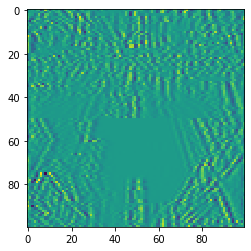

In [18]:
import pickle
import matplotlib.pyplot as plt

#오염된 이미지를 텐서의 형태로 읽고 확인

broken_image = torch.FloatTensor(pickle.load(open('03-파이토치로_구현하는_ANN/broken_image_t.p', 'rb'), encoding='latin1'))

plt.imshow(broken_image.view(100,100))

In [31]:
#이미지를 오염시킨 weird_function 함수

def weird_function(x, n_iter=5):
    h = x    
    filt = torch.tensor([-1./3, 1./3, -1./3])
    for i in range(n_iter):
        zero_tensor = torch.tensor([1.0*0])
        h_l = torch.cat( (zero_tensor, h[:-1]), 0)
        h_r = torch.cat((h[1:], zero_tensor), 0 )
        h = filt[0] * h + filt[2] * h_l + filt[1] * h_r
        if i % 2 == 0:
            h = torch.cat( (h[h.shape[0]//2:],h[:h.shape[0]//2]), 0  )
    return h

In [32]:
#무작위 텐서를 위 함수에 입력해 얻은 가설 텐서와 오염된 이미지 사이의 오차를 구하는 함수 구현
def distance_loss(hypothesis ,broken_image):
    return torch.dist(hypothesis, broken_image)
#torch.dist는 두 텐서 사이의 거리를 구하는 함수로, 이번 예제에서는 단순한 거리를 오찻값으로 설정

In [33]:
#무작위 텐서 생성 (오염 이미지와 같은 모양과 랭크)
random_tensor = torch.randn(10000, dtype=torch.float)

#경사하강법은 여러번 반복으로, 한 반복에서 최솟점으로 얼마나 이동하는지 (흑습을 급하게 진행)을 매개변수로 학습률로 설정가능
lr = 0.8

In [35]:
#경사 하강법 구현
#오차함수를 random_tensor로 미분해야 하니 requires_grad =True로 설정

for i in range(0,20000):
    random_tensor.requires_grad_(True)
    #무작위 텐서를 오염함수에 통과시켜 가설을 구하고 앞서 정의한 거리 오차 함수에 가설과 오염이미지를 입력해 오차 계산
    #그후 backward함수를 호출하여 loss를 random_tensor로 미분
    hypothesis = weird_function(random_tensor)
    loss = distance_loss(hypothesis, broken_image)
    loss.backward()
    #파이토치는 신경망 모델 속 변수들의 경로인 그래프를 생성하지만 이번 예제는 직접구현이라 
    #자동 기울기 계산 비활성
    with torch.no_grad():
        #grad에는 loss의 기울기, 즉 loss가 최대인 점의 방향이 들어있다. 
        #이 방향의 반대쪽으로 random_tensor를 학습률 만큼 이동
        random_tensor = random_tensor - lr*random_tensor.grad
    #for문이 1000번 반복될 때마다 오차 출력    
    if i % 1000 == 0:
        print('Loss at {} = {}'.format(i, loss.item()))

Loss at 0 = 12.312949180603027
Loss at 1000 = 1.1450550556182861
Loss at 2000 = 0.5514751672744751
Loss at 3000 = 0.38270726799964905
Loss at 4000 = 0.300857812166214
Loss at 5000 = 0.2508408725261688
Loss at 6000 = 0.21546228229999542
Loss at 7000 = 0.18778222799301147
Loss at 8000 = 0.1645285189151764
Loss at 9000 = 0.14400501549243927
Loss at 10000 = 0.12527452409267426
Loss at 11000 = 0.10778553038835526
Loss at 12000 = 0.09119365364313126
Loss at 13000 = 0.07527260482311249
Loss at 14000 = 0.05986950173974037
Loss at 15000 = 0.04487960413098335
Loss at 16000 = 0.03023187257349491
Loss at 17000 = 0.021151088178157806
Loss at 18000 = 0.021165093407034874
Loss at 19000 = 0.021166931837797165


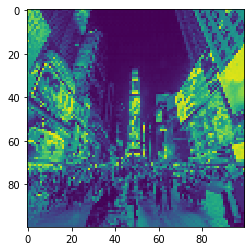

In [36]:
#마지막으로 제대로 복원된지 확인
plt.imshow(random_tensor.view(100,100).data)